In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16,ResNet50,MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)



image_size=(224,224)
train_generator = data_gen.flow_from_directory('animal_data/',  # or correct subfolder
                                               target_size=image_size,
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training')

val_generator=data_gen.flow_from_directory("animal_data/",target_size=image_size,
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset="validation")
base_model=MobileNetV2(weights="imagenet",include_top=False,input_shape=image_size+(3,))
base_model.trainable=False

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [3]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,288,719 (39.25 MB)

 Trainable params: 8,030,479 (30.63 MB)

 Non-trainable params: 2,258,240 (8.61 MB)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator, validation_data= val_generator, epochs = 10, verbose = 2)

Epoch 1/10
49/49 - 115s - 2s/step - accuracy: 0.4715 - loss: 1.8632 - val_accuracy: 0.5953 - val_loss: 1.7018
Epoch 2/10
49/49 - 80s - 2s/step - accuracy: 0.7104 - loss: 1.0035 - val_accuracy: 0.7050 - val_loss: 1.0265
Epoch 3/10
49/49 - 73s - 1s/step - accuracy: 0.7566 - loss: 0.8364 - val_accuracy: 0.7650 - val_loss: 0.8018
Epoch 4/10
49/49 - 86s - 2s/step - accuracy: 0.7918 - loss: 0.7231 - val_accuracy: 0.7650 - val_loss: 0.7401
Epoch 5/10
49/49 - 83s - 2s/step - accuracy: 0.8213 - loss: 0.5898 - val_accuracy: 0.7363 - val_loss: 0.8115
Epoch 6/10
49/49 - 81s - 2s/step - accuracy: 0.8168 - loss: 0.5879 - val_accuracy: 0.7859 - val_loss: 0.7144
Epoch 7/10
49/49 - 82s - 2s/step - accuracy: 0.8430 - loss: 0.5336 - val_accuracy: 0.7807 - val_loss: 0.7187
Epoch 8/10
49/49 - 75s - 2s/step - accuracy: 0.8443 - loss: 0.5422 - val_accuracy: 0.7467 - val_loss: 0.7961
Epoch 9/10
49/49 - 78s - 2s/step - accuracy: 0.8539 - loss: 0.5000 - val_accuracy: 0.7781 - val_loss: 0.6713
Epoch 10/10
49/49 

In [5]:
# Set image size and paths
image_size = (224, 224)
batch_size = 32
data_path = 'animal_data/'

# ✅ Image Data Generator with Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ✅ Data Generators
train_generator = data_gen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = data_gen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# ✅ Pre-trained VGG16 model (without top)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=image_size + (3,))
base_model.trainable = False  # Freeze base model

# ✅ Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(15, activation='softmax')  # 15 classes
])

# ✅ Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Summary
model.summary()

# ✅ Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop],
    verbose=2
)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,424,399 (9.25 MB)

 Trainable params: 166,159 (649.06 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

Epoch 1/30
49/49 - 91s - 2s/step - accuracy: 0.4990 - loss: 1.7705 - val_accuracy: 0.6475 - val_loss: 1.1104
Epoch 2/30
49/49 - 80s - 2s/step - accuracy: 0.7745 - loss: 0.7905 - val_accuracy: 0.7546 - val_loss: 0.7934
Epoch 3/30
49/49 - 82s - 2s/step - accuracy: 0.8065 - loss: 0.6242 - val_accuracy: 0.8094 - val_loss: 0.6439
Epoch 4/30
49/49 - 77s - 2s/step - accuracy: 0.8437 - loss: 0.5322 - val_accuracy: 0.7990 - val_loss: 0.6103
Epoch 5/30
49/49 - 72s - 1s/step - accuracy: 0.8482 - loss: 0.4717 - val_accuracy: 0.8329 - val_loss: 0.5672
Epoch 6/30
49/49 - 82s - 2s/step - accuracy: 0.8744 - loss: 0.4240 - val_accuracy: 0.8225 - val_loss: 0.5908
Epoch 7/30
49/49 - 68s - 1s/step - accuracy: 0.8783 - loss: 0.3928 - val_accuracy: 0.8277 - val_loss: 0.5357
Epoch 8/30
49/49 - 66s - 1s/step - accuracy: 0.8860 - loss: 0.3612 - val_accuracy: 0.8486 - val_loss: 0.5098
Epoch 9/30
49/49 - 67s - 1s/step - accuracy: 0.8975 - loss: 0.3460 - val_accuracy: 0.8146 - val_loss: 0.5969
Epoch 10/30
49/49 -

In [6]:
# Unfreeze last few layers of VGG16
for layer in base_model.layers[-4:]:  # unfreezing last 4 layers
    layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR!
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=45,
    initial_epoch=30,
    callbacks=[early_stop],
    verbose=2
)


Epoch 31/45
49/49 - 101s - 2s/step - accuracy: 0.8975 - loss: 0.3447 - val_accuracy: 0.8460 - val_loss: 0.5327
Epoch 32/45
49/49 - 85s - 2s/step - accuracy: 0.9020 - loss: 0.3302 - val_accuracy: 0.8251 - val_loss: 0.5393
Epoch 33/45
49/49 - 83s - 2s/step - accuracy: 0.8943 - loss: 0.3492 - val_accuracy: 0.8407 - val_loss: 0.5350
Epoch 34/45
49/49 - 82s - 2s/step - accuracy: 0.8981 - loss: 0.3301 - val_accuracy: 0.8198 - val_loss: 0.5468
Epoch 35/45
49/49 - 86s - 2s/step - accuracy: 0.9045 - loss: 0.3093 - val_accuracy: 0.8407 - val_loss: 0.5133
Epoch 36/45
49/49 - 77s - 2s/step - accuracy: 0.9090 - loss: 0.3081 - val_accuracy: 0.8172 - val_loss: 0.5769
Epoch 37/45
49/49 - 79s - 2s/step - accuracy: 0.9090 - loss: 0.3021 - val_accuracy: 0.8355 - val_loss: 0.5020
Epoch 38/45
49/49 - 97s - 2s/step - accuracy: 0.9154 - loss: 0.3008 - val_accuracy: 0.8225 - val_loss: 0.5574
Epoch 39/45
49/49 - 74s - 2s/step - accuracy: 0.9116 - loss: 0.2953 - val_accuracy: 0.8512 - val_loss: 0.5140
Epoch 40/

In [8]:
train_generator = data_gen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

val_generator = data_gen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [9]:
def evaluate_model(generator, dataset_type="Validation"):
    # Get ground truth labels
    true_labels = generator.classes

    # Get predictions
    pred_probs = model.predict(generator, verbose=0)
    pred_labels = np.argmax(pred_probs, axis=1)

    # Class names
    class_names = list(generator.class_indices.keys())

    # Accuracy
    acc = accuracy_score(true_labels, pred_labels)
    print(f"\n📊 {dataset_type} Accuracy: {acc:.4f}\n")

    # Classification report
    print(f"📄 {dataset_type} Classification Report:")
    print(classification_report(true_labels, pred_labels, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title(f'{dataset_type} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



📊 Training Accuracy: 0.9462

📄 Training Classification Report:
              precision    recall  f1-score   support

        Bear       0.96      0.88      0.92       100
        Bird       1.00      0.95      0.97       110
         Cat       0.94      0.92      0.93        99
         Cow       0.97      0.92      0.95       105
        Deer       0.93      0.93      0.93       102
         Dog       0.98      0.85      0.91        98
     Dolphin       0.96      1.00      0.98       104
    Elephant       0.90      0.97      0.94       107
     Giraffe       0.93      0.96      0.95       104
       Horse       0.96      0.95      0.96       104
    Kangaroo       0.87      0.96      0.92       101
        Lion       0.89      0.94      0.92       105
       Panda       1.00      0.94      0.97       108
       Tiger       0.92      1.00      0.96       104
       Zebra       0.99      1.00      1.00       110

    accuracy                           0.95      1561
   macro avg    

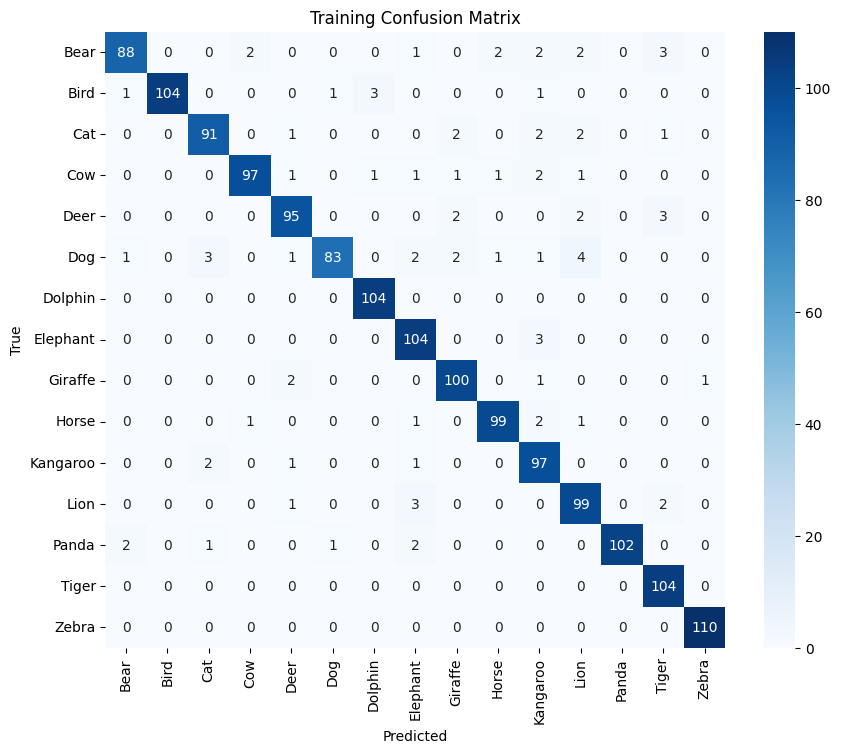


📊 Validation Accuracy: 0.8329

📄 Validation Classification Report:
              precision    recall  f1-score   support

        Bear       0.90      0.76      0.83        25
        Bird       0.81      0.81      0.81        27
         Cat       0.91      0.83      0.87        24
         Cow       0.85      0.65      0.74        26
        Deer       0.79      0.88      0.83        25
         Dog       0.86      0.50      0.63        24
     Dolphin       0.83      0.80      0.82        25
    Elephant       0.81      0.85      0.83        26
     Giraffe       1.00      1.00      1.00        25
       Horse       0.66      0.88      0.75        26
    Kangaroo       0.61      0.76      0.68        25
        Lion       0.72      0.81      0.76        26
       Panda       0.96      0.96      0.96        27
       Tiger       0.92      0.96      0.94        25
       Zebra       1.00      1.00      1.00        27

    accuracy                           0.83       383
   macro avg

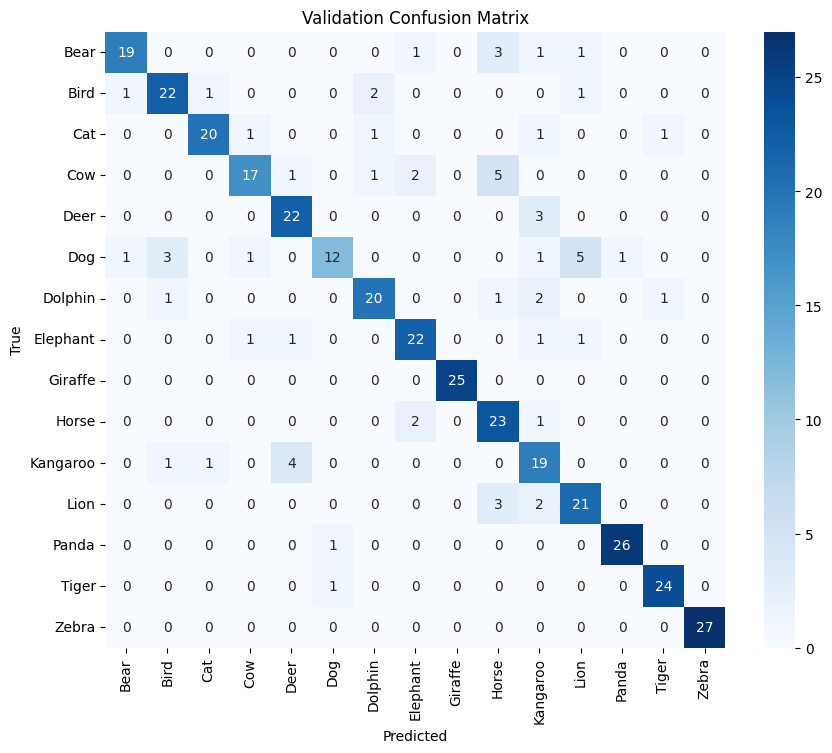

In [10]:
evaluate_model(train_generator, dataset_type="Training")
evaluate_model(val_generator, dataset_type="Validation")

In [11]:
model.save("model/animal_model.h5")

In [12]:
from tensorflow.keras.models import load_model

model = load_model('model/animal_model.h5')


In [13]:
import os
os.makedirs('model', exist_ok=True)
model.save('model/animal_model.h5')
